<a href="https://colab.research.google.com/github/stan587/Data-Science-Portfolio/blob/master/Time_Series_Oil_Price_Forecast/Time_Series_Forecast_of_Brent_and_WTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecast of Brent and WTI

Stan Chen Dec 14, 2019

---
### Introduction
This project is created to showcase the possibilities of performing time-series market prediction with Python scripts. Python is a general purpose programming language which in this case I'm using it to train time series predictive models to fill in the missing piece in corporate process solutions: **Forecasting time series analysis**.


### Why use this python procedure to perform this process?

While it's nice to use specialized software such as SAS or IBM SPSS, licensing these softwares could be expensive. 
No matter what tools or technologies are used in this process, it doesn't change the business process logic **as long as the process is done right**. I personally find it **flexible,cost effective and faster** to perform this process with python scripts. 

---
### Processes involved in this project:
1. Data Ingestion
2. Time series modeling
3. Perform prediction using trained models
---

###  CRISP-DM Framework
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment


Data source:
https://datahub.io/core/oil-prices#python



# Data Ingestion

In [2]:
# !pip install datapackage
from datapackage import Package
import matplotlib.pyplot as plt 
import pandas as pd

dp_url='https://datahub.io/core/oil-prices/datapackage.json'
dp = Package(dp_url)

# print list of all resources:
print(dp.resource_names)

# # print processed tabular data (if exists any)
# for resource in dp.resources:
#     if resource.descriptor['datahub']['type'] == 'derived/csv':
#         print(resource.read())



[u'validation_report', u'brent-daily_csv', u'brent-weekly_csv', u'brent-monthly_csv', u'brent-annual_csv', u'wti-daily_csv', u'wti-weekly_csv', u'wti-monthly_csv', u'wti-annual_csv', u'brent-daily_json', u'brent-weekly_json', u'brent-monthly_json', u'brent-annual_json', u'wti-daily_json', u'wti-weekly_json', u'wti-monthly_json', u'wti-annual_json', u'oil-prices_zip', u'brent-daily_csv_preview', u'wti-daily_csv_preview', u'brent-daily', u'brent-weekly', u'brent-monthly', u'brent-annual', u'wti-daily', u'wti-weekly', u'wti-monthly', u'wti-annual']


In [3]:
# to load only tabular data
src1=dp.get_resource('brent-monthly_csv').read(keyed=True)
src2=dp.get_resource('wti-monthly_csv').read(keyed=True)

In [4]:
# Loading the data into a Panda dataframe
# df1_bre : Data Frame for Brent
df1_bre=pd.DataFrame(src1)
# df2_wti : Data Frame for WTI
df2_wti=pd.DataFrame(src2)

# Visualizing Data

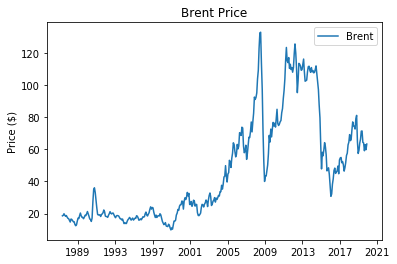

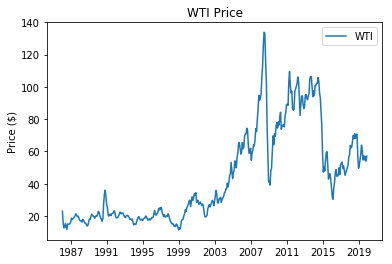

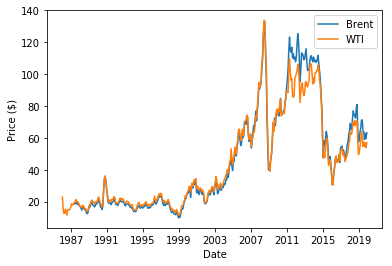

In [6]:
plt.plot(df1_bre['Date'], df1_bre['Price'], label = 'Brent')
plt.title('Brent Price')
plt.ylabel('Price ($)');
plt.legend();
plt.show()

plt.plot(df2_wti['Date'], df2_wti['Price'], label = 'WTI')
plt.title('WTI Price')
plt.ylabel('Price ($)');
plt.legend();
plt.show();

plt.plot(df1_bre['Date'], df1_bre['Price'], label = 'Brent')
plt.plot(df2_wti['Date'], df2_wti['Price'], label = 'WTI')
plt.xlabel('Date');
plt.ylabel('Price ($)');
plt.legend();
plt.show();

# Modeling & Forecasting
While there are several viable options to choose from Prophet, ARIMA, LTMS & other algorithms, in this case we're using Prophet.

In [ ]:
# !pip install fbprophet


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


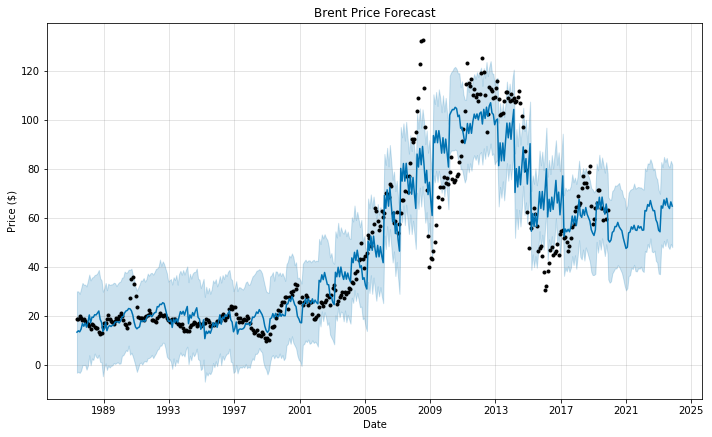

In [8]:
import fbprophet
# Prophet requires columns ds (Date) and y (value)
df1_bre = df1_bre.rename(columns={'Date': 'ds', 'Price': 'y'})
bre_pp = fbprophet.Prophet(changepoint_prior_scale=0.01)

bre_pp.add_seasonality(name='Monthly', period=30.5, fourier_order=4)
bre_pp.add_seasonality(name='2 years', period=365*2, fourier_order=4)

bre_pp.fit(df1_bre)

# Make a future dataframe for 2 years
bre_forecast = bre_pp.make_future_dataframe(periods=12 * 4, freq='M')

# Make predictions
bre_forecast = bre_pp.predict(bre_forecast)

# Plot Projection
bre_pp.plot(bre_forecast, xlabel = 'Date', ylabel = 'Price ($)', uncertainty = True)
plt.title('Brent Price Forecast');

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


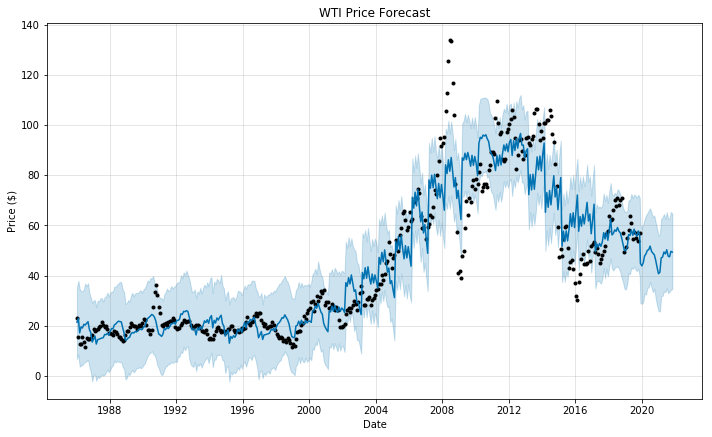

In [9]:
df2_wti = df2_wti.rename(columns={'Date': 'ds', 'Price': 'y'})
wti_pp = fbprophet.Prophet(changepoint_prior_scale=0.0225)
wti_pp.add_seasonality(name='Monthly', period=30.5, fourier_order=4)
wti_pp.add_seasonality(name='2 years', period=365*2, fourier_order=4)

wti_pp.fit(df2_wti)

# Make a future dataframe for 2 years
wti_forecast = wti_pp.make_future_dataframe(periods=12 * 2, freq='M')

# Make predictions
wti_forecast = wti_pp.predict(wti_forecast)


# Plot Projection
wti_pp.plot(wti_forecast, xlabel = 'Date', ylabel = 'Price ($)', uncertainty = True)
plt.title('WTI Price Forecast');

# Plotting Trends and patterns


Brent Forecast Trends and Patterns:


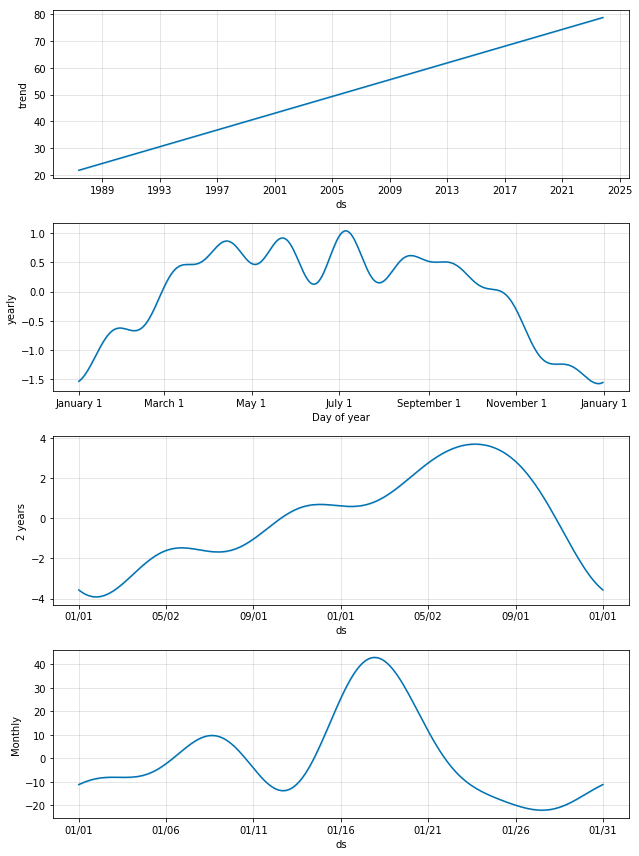

In [10]:
print("Brent Forecast Trends and Patterns:")
bre_pp.plot_components(bre_forecast, uncertainty = True);



WTI Forecast Trends and Patterns:


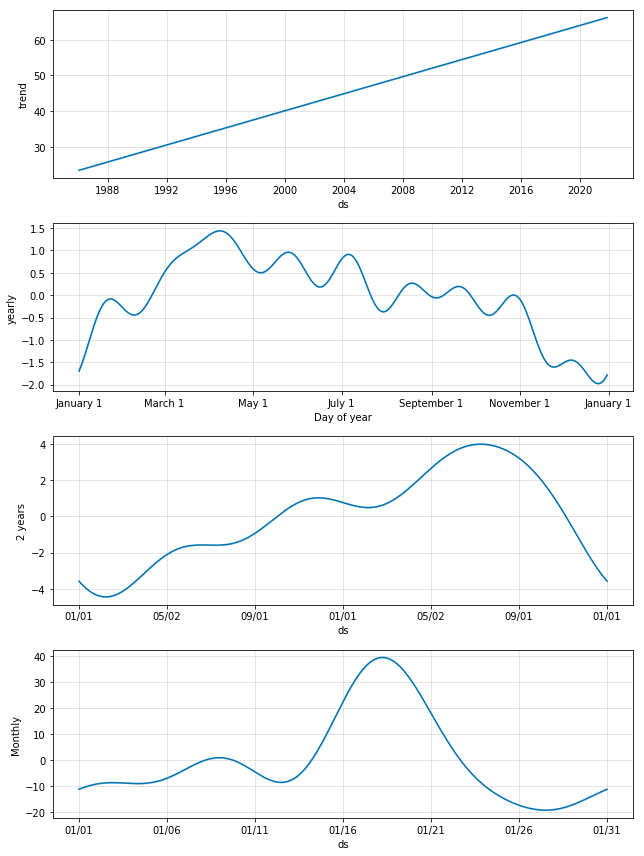

In [11]:
print("WTI Forecast Trends and Patterns:")
wti_pp.plot_components(wti_forecast, uncertainty = True);

In [15]:
bre_forecast.to_csv('bre_forecastOutput2.csv')
wti_forecast.to_csv('wti_forecastOutput2.csv')
bre_forecast


ds      trend  trend_lower  trend_upper  yhat_lower  yhat_upper  \
0   1987-05-15  21.708135    21.708135    21.708135   -3.265462   29.996565   
1   1987-06-15  21.841164    21.841164    21.841164   -2.881624   29.966112   
2   1987-07-15  21.969902    21.969902    21.969902   -3.340141   28.974884   
3   1987-08-15  22.102932    22.102932    22.102932   -2.411155   31.078590   
4   1987-09-15  22.235961    22.235961    22.235961   -0.153566   33.420639   
5   1987-10-15  22.364699    22.364699    22.364699   -0.160283   32.663884   
6   1987-11-15  22.497729    22.497729    22.497729   -0.052686   32.727956   
7   1987-12-15  22.626467    22.626467    22.626467   -2.035837   31.994457   
8   1988-01-15  22.759497    22.759497    22.759497   -0.398545   34.294738   
9   1988-02-15  22.892526    22.892526    22.892526    3.857549   36.850718   
10  1988-03-15  23.016973    23.016973    23.016973   -0.212699   34.457874   
11  1988-04-15  23.150002    23.150002    23.150002    2.552158   35.600584   
12  1988-05-15  23.278741    23.278741    23.278741    1.952073   35.869886   
13  1988-06-15  23.411770    23.411770    23.411770    4.575086   36.675908   
14  1988-07-15  23.540508    23.540508    23.540508    3.283719   36.818987   
15  1988-08-15  23.673538    23.673538    23.673538    2.731095   37.446010   
16  1988-09-15  23.806567    23.806567    23.806567    4.078082   38.733941   
17  1988-10-15  23.935305    23.935305    23.935305    1.136087   35.341809   
18  1988-11-15  24.068335    24.068335    24.068335    0.988516   34.465379   
19  1988-12-15  24.197073    24.197073    24.197073   -4.726479   29.867515   
20  1989-01-15  24.330103    24.330103    24.330103   -1.090280   31.090536   
21  1989-02-15  24.463132    24.463132    24.463132    0.517299   33.409593   
22  1989-03-15  24.583288    24.583288    24.583288   -2.125544   30.451386   
23  1989-04-15  24.716317    24.716317    24.716317   -0.318652   33.126313   
24  1989-05-15  24.845055    24.845055    24.845055   -1.151374   32.599033   
25  1989-06-15  24.978085    24.978085    24.978085   -0.447468   32.802467   
26  1989-07-15  25.106823    25.106823    25.106823   -0.309897   32.887995   
27  1989-08-15  25.239852    25.239852    25.239852    0.688678   33.501800   
28  1989-09-15  25.372882    25.372882    25.372882    0.330624   33.306271   
29  1989-10-15  25.501620    25.501620    25.501620    0.782053   32.095345   
..         ...        ...          ...          ...         ...         ...   
409 2021-05-31  75.069760    75.069759    75.069762   39.103211   71.922578   
410 2021-06-30  75.198497    75.198495    75.198498   40.823463   74.054291   
411 2021-07-31  75.331524    75.331523    75.331526   38.267129   71.942210   
412 2021-08-31  75.464552    75.464550    75.464553   38.142288   72.341802   
413 2021-09-30  75.593288    75.593286    75.593290   39.472719   72.656508   
414 2021-10-31  75.726316    75.726314    75.726317   39.248987   72.445165   
415 2021-11-30  75.855052    75.855050    75.855054   40.092322   72.438119   
416 2021-12-31  75.988079    75.988077    75.988081   38.472195   71.887738   
417 2022-01-31  76.121107    76.121104    76.121109   37.899874   71.548594   
418 2022-02-28  76.241261    76.241258    76.241263   46.459236   80.265348   
419 2022-03-31  76.374288    76.374285    76.374291   46.040388   79.129446   
420 2022-04-30  76.503024    76.503022    76.503027   49.330657   82.279831   
421 2022-05-31  76.636052    76.636049    76.636055   47.815044   82.008491   
422 2022-06-30  76.764788    76.764785    76.764791   51.621685   84.002459   
423 2022-07-31  76.897816    76.897812    76.897819   46.264621   82.421423   
424 2022-08-31  77.030843    77.030840    77.030847   45.968566   79.474650   
425 2022-09-30  77.159580    77.159576    77.159583   46.618085   80.274899   
426 2022-10-31  77.292607    77.292603    77.292611   42.487441   76.715433   
427 2022-11-30  77.421343    77.421339    77.421347   41.73726

In [13]:
print(bre_forecast[:50])
print(df1_bre[:50])

           ds      trend  trend_lower  trend_upper  yhat_lower  yhat_upper  \
0  1987-05-15  21.708135    21.708135    21.708135   -3.265462   29.996565   
1  1987-06-15  21.841164    21.841164    21.841164   -2.881624   29.966112   
2  1987-07-15  21.969902    21.969902    21.969902   -3.340141   28.974884   
3  1987-08-15  22.102932    22.102932    22.102932   -2.411155   31.078590   
4  1987-09-15  22.235961    22.235961    22.235961   -0.153566   33.420639   
5  1987-10-15  22.364699    22.364699    22.364699   -0.160283   32.663884   
6  1987-11-15  22.497729    22.497729    22.497729   -0.052686   32.727956   
7  1987-12-15  22.626467    22.626467    22.626467   -2.035837   31.994457   
8  1988-01-15  22.759497    22.759497    22.759497   -0.398545   34.294738   
9  1988-02-15  22.892526    22.892526    22.892526    3.857549   36.850718   
10 1988-03-15  23.016973    23.016973    23.016973   -0.212699   34.457874   
11 1988-04-15  23.150002    23.150002    23.150002    2.552158  

# Changepoint Reports

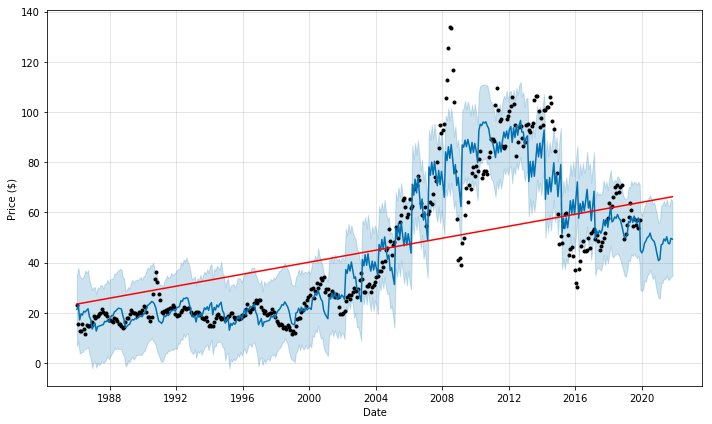

In [14]:
from fbprophet.plot import add_changepoints_to_plot
fig = wti_pp.plot(wti_forecast, xlabel = 'Date', ylabel = 'Price ($)', uncertainty = True)
a = add_changepoints_to_plot(fig.gca(), wti_pp, wti_forecast)

### References:

https://pypi.org/project/datapackage/#resource

https://datahub.io/docs/getting-started/getting-data

https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a

https://towardsdatascience.com/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python-6ceee9c6c651


https://www.tensorflow.org/tutorials/structured_data/time_series